<a href="https://colab.research.google.com/github/mkunyosi/FLAI/blob/learning/Estudo_NLP_Telegram_Comunidade_Flai_revMai22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise grupo Telegram: Comunidade Flai

**Objetivo**: 

Utilizar técnicas de NLP (nuvem de palarvas, extração de sentimentos, extração de tópicos etc), montando um código em Python comentado e explicado. 

**Origem deste estudo**:

Este estudo foi desenvolvido por Lucas Fávero, estudante do curso de extensão de Processamento de Linguagem Natural (PLN) do ICMC-USP, o qual parabenizo pela excelente iniciativa que oportuniza a possibilidade de outros estudantes na área terem acesso mais fácil a tais ferramentas. 

**Adaptação/Co-autoria:**

Através desse excelente estudo, Rafael Batista e Marcos Kunyosi (alunos da Flai), realizaram as devidas adaptações para o telegram da Comunidade Flai, identificando as variáveis e classificando as mensagens no ranking TOP 10 e a nuvem de palavras (wordcloud) mais discutidas no grupo.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import json
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')

# Configurando a biblioteca pandas para mostrar todos os dados dentro do nosso Dataframe
pd.set_option("display.max_rows", 9999)
pd.set_option("display.max_columns", 99)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Através do Telegram Desktop, realizar a exportação do histórico das conversas em .json, depois incluir o arquivo aqui no Colab ou no google drive, realizando a importação abaixo.

In [100]:
bRodarCodigo = False

In [129]:
# Abrindo o arquivo result.json que contem todas as mensagem extraidas do grupo
f = open("result.json", encoding="utf8")

# Carregando as mensagens do result.json
data = json.load(f)

# Carregando os campos importantes para construção do nosso Dataframe
msgs = data["messages"]

# Printando a estrutura de dados que contem informações sobre as mensagens do grupo
msgs

[{'date': '2022-01-01T19:24:48',
  'from': 'Marcelo Moraes',
  'from_id': 'user1052070675',
  'id': 18298,
  'text': 'Passando para desejar um FELIZ 2022! Que seja um ano repleto de coisas boas, muita alegria e realizações!',
  'type': 'message'},
 {'date': '2022-01-01T21:24:35',
  'from': 'Cássio Luis',
  'from_id': 'user288261093',
  'id': 18299,
  'text': 'Boa noite pessoal',
  'type': 'message'},
 {'date': '2022-01-01T21:25:28',
  'from': 'Cássio Luis',
  'from_id': 'user288261093',
  'id': 18300,
  'text': ['A Faculdade FIAP, ',
   {'text': 'https://www.fiap.com.br/', 'type': 'link'},
   ', Liberou 20 Cursos com duração entre 40 e 160 horas, todos gratuitos.\n\nQuem se interessar é só se inscrever no link:\n',
   {'text': 'https://on.fiap.com.br/local/movimentobrasildigital/',
    'type': 'link'},
   '\n\nOs cursos são:\n• Blockchain Advanced - (100 horas)\n• Business Intelligence - (40 horas)\n• Customer Experience Management - (40 horas)\n• Design Thinking - (40 horas)\n• DevOps

Aqui vamos construir o Dataframe contendo toda a informação extraída do grupo. Nesse momento, nossos campos mais importantes são: "from" que representa de quem é a mensagem, e "text" que é a própria mensagem. 

In [130]:
# Construindo o Dataframe a partir da variavél msgs que foi formatada
df = pd.DataFrame(msgs)

# Printando o Dataframe
df

,id,type,date,from,from_id,text,photo,width,height,reply_to_message_id,file,thumbnail,media_type,mime_type,duration_seconds,forwarded_from,saved_from,actor,actor_id,action,inviter,edited,members,via_bot,message_id,sticker_emoji
0,18298,message,2022-01-01T19:24:48,Marcelo Moraes,user1052070675,Passando para desejar um FELIZ 2022! Que seja ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18299,message,2022-01-01T21:24:35,Cássio Luis,user288261093,Boa noite pessoal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18300,message,2022-01-01T21:25:28,Cássio Luis,user288261093,"[A Faculdade FIAP, , {'type': 'link', 'text': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18301,message,2022-01-01T21:26:55,Cássio Luis,user288261093,Acho que vale a pena compartilhar com vcs.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18302,message,2022-01-01T23:40:38,Victor Sponchiado,user1180691996,👏,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12014,30572,message,2022-06-02T11:18:29,Edson Deodato,user1229199780,kkkkkk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12015,30573,message,2022-06-02T11:26:54,Monaliza,user1385036096,Tô fazendo AQUELA propaganda do curso... só ac...,(File not included. Change data exporting sett...,960.0,1280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12016,30574,message,2022-06-02T11:29:54,Adriana Takahagui,user1343857724,"Boa, Monaliza, vamos montar uma campanha, kit ...",NaN,NaN,NaN,30573.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12017,30575,message,2022-06-02T11:48:20,Andre,user1261979596,"Nossa, já está em tempo da competição haha",NaN,NaN,NaN,30566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Com o Pandas podemos acessar os atributos .shape e .columns, assim podemos verificar as dimensões e colunas do Dataframe.

In [131]:
# Estrutura do Dataframe
df.shape

(12019, 26)

In [132]:
def LimparMsg(df):
    # esse comando exclui os registros em que o campo 'text' possui valores em branco
    texto_branco = df.loc[(df['text'] == '')]
    print(f"Msgs sem texto excluídas: {texto_branco.shape}")
    df = df.drop(texto_branco.index)

    # # limpeza de dados de usuários-robos da comunidade
    # lst_noUsers = [df['from'] == '🤖 Flávia da FLAI', 
    #                df['from'] == 'Comunidade FLAI',
    #                df['from'] == 'Canal Comunidade FLAI',
    #                ]
    
    texto_branco = df.loc[(df['from'] == '🤖 Flávia da FLAI') 
                            | (df['from'] == 'Canal Comunidade FLAI') 
                            | (df['from'] == 'Comunidade FLAI') 
                            # | (df['from'] == 'Stephanie') 
                            # | (df['from'] == 'Rafael Batista') 
                            # | (df['from'] == 'Ricardo') 
                            ]
    
    print(f"Msgs de robôs excluídas: {texto_branco.shape}")
    df = df.drop(texto_branco.index)

    return df;

In [133]:
df = LimparMsg(df)

Msgs sem texto excluídas: (577, 26)
Msgs de robôs excluídas: (493, 26)


In [134]:
# esse comando permite localizar e informar a quantidade de registros de um determinado usuário
df.loc[(df['from'] == 'Rafael Batista')].count()

id                     1218
type                   1218
date                   1218
from                   1218
from_id                1218
text                   1218
photo                    12
width                    12
height                   12
reply_to_message_id     369
file                      2
thumbnail                 2
media_type                0
mime_type                 2
duration_seconds          0
forwarded_from            1
saved_from                0
actor                     0
actor_id                  0
action                    0
inviter                   0
edited                  133
members                   0
via_bot                   0
message_id                0
sticker_emoji             0
dtype: int64

In [135]:
# Nome de todas as colunas do Dataframe
df.columns

Index(['id', 'type', 'date', 'from', 'from_id', 'text', 'photo', 'width',
       'height', 'reply_to_message_id', 'file', 'thumbnail', 'media_type',
       'mime_type', 'duration_seconds', 'forwarded_from', 'saved_from',
       'actor', 'actor_id', 'action', 'inviter', 'edited', 'members',
       'via_bot', 'message_id', 'sticker_emoji'],
      dtype='object')

O próximo passo é agrupar as mensagens por autor e plotar os primeiros autores com mais mensagens dentro do grupo. Para isso utilizamos os métodos groupby() e plot() do Pandas. 

In [136]:
# Criando um novo Dataframe que vai receber o agrupamento a partir da coluna "from" que representa os autores das mensagens
# Também usamos o método count()
# a contagem aqui é para quantidade de msg enviadas (coluna 'from')
# uma outra abordagem seria fazer a contagem de palavras em cada msg, ou contagem de letras, (coluna 'text')
df_top10_text = df[['text','from']].groupby(['from']).count().sort_values(['text'], ascending=False).head(10)

# Resetando o index do Dataframe 
df_top10_text.reset_index(inplace=True)

# Printando o Dataframe
df_top10_text

,from,text
0,Stephanie,1849
1,Rafael Batista,1218
2,Willian Belli,541
3,Andre,535
4,Leon Emiliano Benenati,453
5,Ricardo,410
6,Victor Araújo,388
7,Marcos Kunyosi,345
8,Edson Deodato,295
9,Adriana Takahagui,266


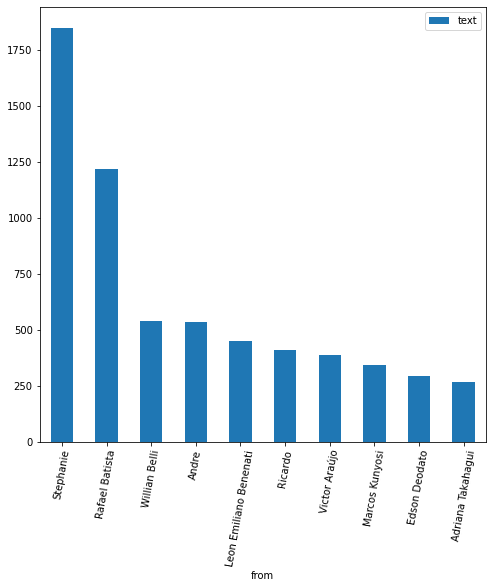

In [137]:
# Usando o método plot.bar() do Pandas para printar um gráfico de barras do novo Dataframe que foi criado anteriormente
df_top10_text.plot.bar(x= "from", y="text", rot=80, figsize=(8, 8));

## Análise por tamanho das mensagens

In [138]:
# nova coluna para conter o total de letras na coluna 'text' (tamanho da mensagem)
df['text-len'] = df['text'].map(lambda x: len(x))

# análise de frequência: abordagem tamanho da mensagem enviada
df_top10_text_len = df[['text-len','from']].groupby(['from']).sum(['text-len']).sort_values(['text-len'], ascending=False).head(10)

# Resetando o index do Dataframe 
df_top10_text_len.reset_index(inplace=True)

# Printando o Dataframe
df_top10_text_len

,from,text-len
0,Stephanie,99374
1,Rafael Batista,60837
2,Willian Belli,41421
3,Marcos Kunyosi,37928
4,Andre,25832
5,Victor Araújo,24232
6,Ricardo,21195
7,Ítalo Lopes,21026
8,Adriana Takahagui,20842
9,Leon Emiliano Benenati,18575


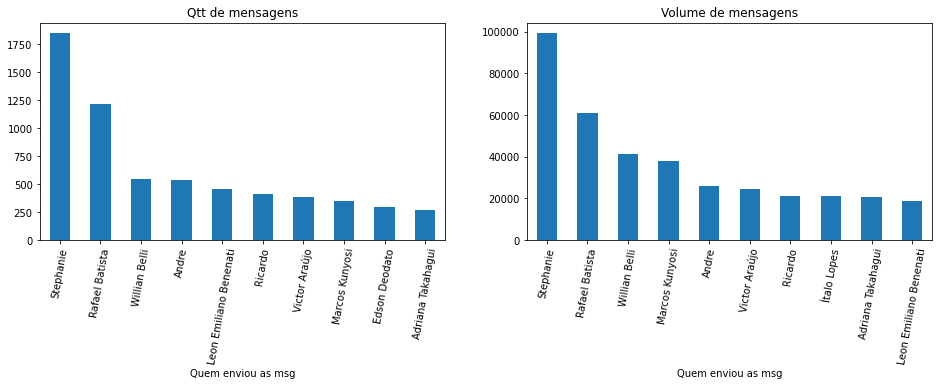

In [139]:
# Análise gráfica: usuários mais ativos

figure, axes = plt.subplots(1, 2)

df_top10_text.plot.bar(ax=axes[0], 
                       x= "from", y="text", 
                       rot=80, 
                       figsize=(16, 4), 
                       title="Qtt de mensagens",
                       xlabel='Quem enviou as msg',
                       legend=False);

df_top10_text_len.plot.bar(ax=axes[1], 
                           x= "from", y="text-len", 
                           rot=80, figsize=(16, 4), 
                           title='Volume de mensagens',
                           xlabel='Quem enviou as msg',
                           legend=False);


# Análise mensal Comunidade Flai

Neste tópico realizaremos a análise das informações do Grupo do Telegram pelos períodos mensais.

Para possibilitar um maior conhecimento do código e utilização do python, resolvemos manter os 02(dois) pontos de vistas dos co-autores para que o leitor possa compreender sob diferentes óticas o código.

## Código base: Rafael Batista

In [13]:
# Criando uma função para realizar a consulta das informações referentes a períodos mensais
def Consulta(i):
    base = df.loc[(df['date'] > ('2021-'+i+'-01T00:00:00'))&(df['date'] < ('2021-'+i+'-31T23:59:59'))]
    base_res = base[['text','from']].groupby(['from']).count().sort_values(['text'], ascending=False)
    base_res.reset_index(inplace=True)
    return base_res

In [14]:
#janeiro = Consulta('01')
#janeiro = janeiro.rename(columns={'text': 'jan'})
#fevereiro = Consulta('02')
#fevereiro = fevereiro.rename(columns={'text': 'fev'})
#marco = Consulta('03')
#marco = marco.rename(columns={'text': 'mar'})
abril = Consulta('04')
abril = abril.rename(columns={'text': 'abr'})
maio = Consulta('05')
maio = maio.rename(columns={'text': 'mai'})
junho = Consulta('06')
junho = junho.rename(columns={'text': 'jun'})
julho = Consulta('07')
julho = julho.rename(columns={'text': 'jul'})
agosto = Consulta('08')
agosto = agosto.rename(columns={'text': 'ago'})
setembro = Consulta('09')
setembro = setembro.rename(columns={'text': 'set'})
outubro = Consulta('10')
outubro = outubro.rename(columns={'text': 'out'})
novembro = Consulta('11')
novembro = novembro.rename(columns={'text': 'nov'})
dezembro = Consulta('12')
dezembro = dezembro.rename(columns={'text': 'dez'})

In [15]:
# Conferindo as informações de um período específico
agosto.head(10)

,from,ago


In [ ]:
# realizando a junção dos dataframes mensais em um único
merge_01 = pd.merge(abril, maio, how = 'outer')
merge_02 = pd.merge(junho, julho, how = 'outer')
merge_03 = pd.merge(agosto, setembro, how = 'outer')
merge_04 = pd.merge(outubro, novembro, how = 'outer')
merge_05 = pd.merge(merge_01, merge_02, how = 'outer')
merge_06 = pd.merge(merge_05, merge_03, how = 'outer')
merge_07 = pd.merge(merge_06, merge_04, how = 'outer')
comunidade_flai = pd.merge(merge_07, dezembro, how = 'outer')

In [ ]:
# conferindo o dataframe criado
comunidade_flai.head(10)

,from,abr,mai,jun,jul,ago,set,out,nov,dez
0,Filgueiras,30.0,231.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vitor Time FLAI,22.0,11.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,Vitor Diego,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ricardo,14.0,107.0,111.0,182.0,37.0,115.0,77.0,154.0,40.0
4,Rafael Batista,12.0,130.0,171.0,435.0,157.0,342.0,48.0,357.0,179.0
5,Ana Bricio,11.0,75.0,24.0,2.0,NaN,NaN,2.0,NaN,NaN
6,Isabel Gontijo,11.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
7,L.,10.0,19.0,12.0,13.0,NaN,NaN,NaN,NaN,NaN
8,Group Help,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Luiz Mestraaum,3.0,107.0,4.0,20.0,12.0,53.0,7.0,12.0,11.0


In [ ]:
# realizando consultas através de filtros no pandas com a função "sort_values"
comunidade_flai.sort_values(by=['out'], ascending=False).head(10)

,from,abr,mai,jun,jul,ago,set,out,nov,dez
166,Stephanie Flai,NaN,NaN,NaN,NaN,15.0,443.0,474.0,302.0,132.0
168,Leon Emiliano Benenati,NaN,NaN,NaN,NaN,4.0,67.0,128.0,49.0,NaN
25,Jonas,NaN,56.0,71.0,150.0,26.0,91.0,81.0,28.0,3.0
3,Ricardo,14.0,107.0,111.0,182.0,37.0,115.0,77.0,154.0,40.0
26,Victor Sponchiado,NaN,49.0,46.0,126.0,68.0,111.0,73.0,105.0,57.0
185,Otávio Soares,NaN,NaN,NaN,NaN,NaN,47.0,67.0,26.0,24.0
22,Juliana FLAI,NaN,104.0,80.0,122.0,75.0,136.0,66.0,119.0,169.0
108,Edson,NaN,NaN,NaN,58.0,73.0,86.0,52.0,107.0,66.0
4,Rafael Batista,12.0,130.0,171.0,435.0,157.0,342.0,48.0,357.0,179.0
24,Andre,NaN,76.0,45.0,63.0,30.0,128.0,45.0,107.0,15.0


In [ ]:
# realizando consulta e comparativo de dois períodos
comunidade_flai[['from','dez','ago']].sort_values(by=['dez'], ascending=False).head(10)

,from,dez,ago
4,Rafael Batista,179.0,157.0
22,Juliana FLAI,169.0,75.0
166,Stephanie Flai,132.0,15.0
45,Nayara,75.0,71.0
108,Edson,66.0,73.0
23,Victor Araújo,66.0,79.0
341,Leandro Dos Santos,59.0,NaN
26,Victor Sponchiado,57.0,68.0
111,Vanio,42.0,23.0
117,Ítalo Lopes,41.0,16.0


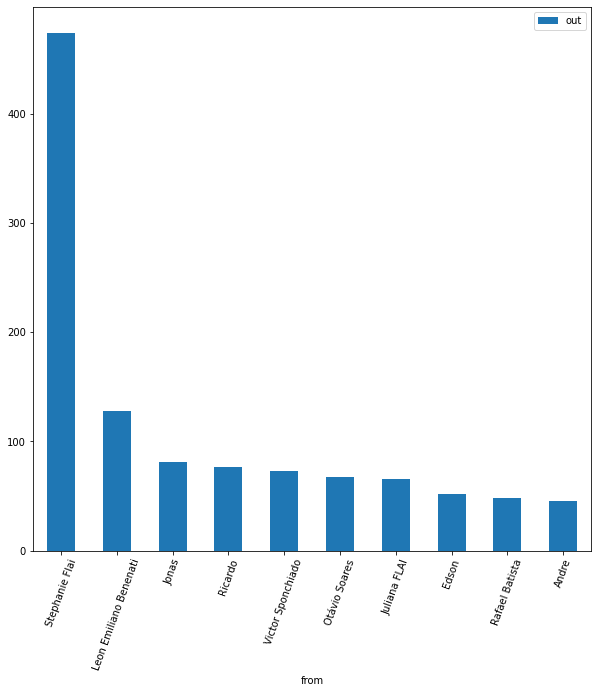

In [ ]:
# Usando o método plot.bar() do Pandas para printar um gráfico de barras do período desejado
# como a base mensal possui várias linhas, realizamos um recorte da base, considerando o ranking dos 10 primeiros para plotar no gráfico
periodo_graf = outubro.head(10)
periodo_graf.plot.bar(x= "from", y="out", rot=70, figsize=(10, 10));

## Código base: Marcos Kunyosi

In [140]:
#  recebe: um dataframe, ano e mes para consulta
#  devolve: um dataframe com os nomes (sem ordenação), quantide de msg enviadas e respectivos tamanho de msg 
def ConsultaDadosMes(dFrame, ano, mes,  sort='vol', topN=-1):
    txt_begin = '{:04d}-{:02d}-01T00:00:00'.format(ano, mes)
    mes += 1
    if mes > 12:
        ano += 1
        mes = 1
    txt_end = '{:04d}-{:02d}-01T00:00:00'.format(ano, mes)
    #debug
    #print(txt_begin)
    #print(txt_end)
    #print(topN)
    
    base = dFrame.loc[(df['date'] >= (txt_begin)) & (df['date'] < (txt_end))]
 
    base_res = base[['text','from']].groupby(['from']).count() 
    base_res['text-len'] = base[['text-len','from']].groupby(['from']).sum(['text-len'])
    
    base_res.reset_index(inplace=True)
    
    if sort == 'qtt':
        base_res = base_res.sort_values(['text'], ascending=False).head(topN)
        columns = ['from', 'text', 'text-len']
    elif sort == 'vol':
        base_res = base_res.sort_values(['text-len'], ascending=False).head(topN)
        columns = ['from', 'text-len', 'text']
    elif sort == 'none':        
        columns = ['from', 'text-len', 'text']
    else:
        raise Exception("Opção de ordenação inválida!")

    base_res['rank'] = range(1, base_res.shape[0]+1)
    columns.insert(0, 'rank')
    base_res = base_res[columns]


    return base_res

In [141]:
#  recebe: um dataframe, ano e mes para consulta
#  devolve: um dataframe com os nomes (sem ordenação), quantide de msg enviadas e respectivos tamanho de msg 
def ConsultaDadosPeriodo(dFrame, ano_ini, mes_ini, ano_fim, mes_fim,  sort='vol', topN=-1):
    txt_begin = '{:04d}-{:02d}-01T00:00:00'.format(ano_ini, mes_ini)
    mes_fim += 1
    if mes_fim > 12:
        ano_fim += 1
        mes_fim = 1
    txt_end = '{:04d}-{:02d}-01T00:00:00'.format(ano_fim, mes_fim)
    #debug
    #print(txt_begin)
    #print(txt_end)
    #print(topN)
    
    base = dFrame.loc[(df['date'] >= (txt_begin)) & (df['date'] < (txt_end))]
 
    base_res = base[['text','from']].groupby(['from']).count() 
    base_res['text-len'] = base[['text-len','from']].groupby(['from']).sum(['text-len'])
    
    base_res.reset_index(inplace=True)
    
    if sort == 'qtt':
        base_res = base_res.sort_values(['text'], ascending=False).head(topN)
        columns = ['from', 'text', 'text-len']
    elif sort == 'vol':
        base_res = base_res.sort_values(['text-len'], ascending=False).head(topN)
        columns = ['from', 'text-len', 'text']
    elif sort == 'none':        
        columns = ['from', 'text-len', 'text']
    else:
        raise Exception("Opção de ordenação inválida!")

    base_res['rank'] = range(1, base_res.shape[0]+1)
    columns.insert(0, 'rank')
    base_res = base_res[columns]


    return base_res

In [142]:
# Exemplo de chamada da nova função Consulta
# Revisado por Marcos Kunyosi
ano_ini=2022
mes_ini=3

ano_fim=2022
mes_fim=5

top_N=10
# cons = ConsultaDadosMes(df, 2022, mes, sort='qtt', topN = top_N)
cons = ConsultaDadosPeriodo(df, ano_ini, mes_ini, ano_fim, mes_fim, sort='qtt', topN = top_N)
print(f"\nTop-{top_N}: qtt de msg enviadas (período entre {mes_ini}/{ano_ini} e {mes_fim}/{ano_fim})")
print(cons.to_string(index=False))

# cons = ConsultaDadosMes(df, 2022, mes, sort='vol', topN = top_N)
cons = ConsultaDadosPeriodo(df, ano_ini, mes_ini, ano_fim, mes_fim, sort='vol', topN = top_N)
print(f"\nTop-{top_N}: volume de msg enviadas (período entre {mes_ini}/{ano_ini} e {mes_fim}/{ano_fim})")
print(cons.to_string(index=False))



Top-10: qtt de msg enviadas (período entre 3/2022 e 5/2022)
 rank              from  text  text-len
    1         Stephanie   945     53503
    2    Rafael Batista   633     34164
    3     Willian Belli   541     41421
    4     Victor Araújo   262     16513
    5           Ricardo   189     13144
    6             Vanio   184     10880
    7 Antonio Fernandes   166     11391
    8    Marcos Kunyosi   155     20935
    9       Ítalo Lopes   147     13829
   10             Andre   141      8573

Top-10: volume de msg enviadas (período entre 3/2022 e 5/2022)
 rank              from  text-len  text
    1         Stephanie     53503   945
    2     Willian Belli     41421   541
    3    Rafael Batista     34164   633
    4    Marcos Kunyosi     20935   155
    5     Victor Araújo     16513   262
    6       Ítalo Lopes     13829   147
    7           Ricardo     13144   189
    8 Adriana Takahagui     11595   138
    9 Antonio Fernandes     11391   166
   10             Vanio     10880  

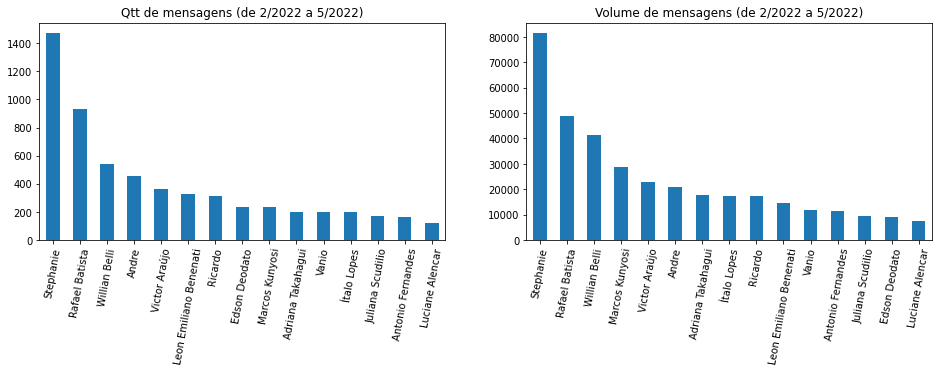

In [143]:
# Análise gráfica: usuários mais ativos


#periodo_graf = outubro.head(10)
#periodo_graf.plot.bar(x= "from", y="out", rot=70, figsize=(10, 10));

ano_ini=2022
mes_ini=2

ano_fim=2022
mes_fim=5

top_N = 15

figure, axes = plt.subplots(1, 2)

# cons = ConsultaDadosMes(df, 2022, mes, sort='qtt', topN = top_N)
cons = ConsultaDadosPeriodo(df, ano_ini, mes_ini, ano_fim, mes_fim, sort='qtt', topN = top_N)
cons.plot.bar(ax=axes[0], 
                       x= "from", y="text", 
                       rot=80, 
                       figsize=(16, 4), 
                       title=f"Qtt de mensagens (de {mes_ini}/{ano_ini} a {mes_fim}/{ano_fim})",
                       xlabel='', #'Quem enviou as msgs',
                       legend=False);

# cons = ConsultaDadosMes(df, 2022, mes, sort='vol', topN = top_N)
cons = ConsultaDadosPeriodo(df, ano_ini, mes_ini, ano_fim, mes_fim, sort='vol', topN = top_N)
cons.plot.bar(ax=axes[1], 
                           x= "from", y="text-len", 
                           rot=80, figsize=(16, 4), 
                           title=f'Volume de mensagens (de {mes_ini}/{ano_ini} a {mes_fim}/{ano_fim})',
                           xlabel='', #'Quem enviou as msgs',
                           legend=False);


## Outras análises


In [ ]:
# Exemplo de chamada da nova função Consulta
mes = 4
txt_replace_qtt = 'N-msg({:02d})'
txt_replace_vol = 'Vol-msg({:02d})'

#allConsultas = Consulta2(df, 2021, mes)
allConsultas = ConsultaDadosMes(df, 2021, mes, sort='none', topN = -1)
allConsultas = allConsultas.rename(columns={'text': txt_replace_qtt.format(mes), 'text-len': txt_replace_vol.format(mes)})
for mes in range(5, 13):
    #consult = Consulta2(df, 2021, mes)
    consult = ConsultaDadosMes(df, 2021, mes, sort='none', topN = -1)
    consult = consult.rename(columns={'text': txt_replace_qtt.format(mes), 'text-len': txt_replace_vol.format(mes)})
    allConsultas = allConsultas.merge(consult, on="from", how='outer')


In [ ]:
allConsultas.head(5)

,rank_x,from,Vol-msg(04),N-msg(04),rank_y,Vol-msg(05),N-msg(05),rank_x,Vol-msg(06),N-msg(06),rank_y,Vol-msg(07),N-msg(07),rank_x,Vol-msg(08),N-msg(08),rank_y,Vol-msg(09),N-msg(09),rank_x,Vol-msg(10),N-msg(10),rank_y,Vol-msg(11),N-msg(11),rank,Vol-msg(12),N-msg(12)
0,1.0,Adriana,11.0,1.0,1.0,19.0,2.0,2.0,38.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Agner,340.0,2.0,3.0,127.0,3.0,3.0,168.0,4.0,2.0,95.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,99.0,2.0,NaN,NaN,NaN
2,3.0,Aline Pacheco,344.0,2.0,8.0,1702.0,30.0,8.0,282.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Ana Bricio,556.0,11.0,11.0,3727.0,75.0,9.0,760.0,24.0,10.0,50.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,67.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Daniel Fonseca,8.0,1.0,21.0,665.0,24.0,19.0,122.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Conferindo as informações de um período específico (apenas um mês) com ordenação pelo volume de mensagens
def dadosMes(mes_consulta, sort='vol'):
    #mes_consulta=10
    txt_replace_qtt = 'N-msg({:02d})'
    txt_replace_vol = 'Vol-msg({:02d})'
    if sort == 'vol':
        ret_dados = allConsultas[['from', 
                  txt_replace_qtt.format(mes_consulta), 
                  txt_replace_vol.format(mes_consulta)] 
                  ].sort_values([txt_replace_vol.format(mes_consulta)], ascending=False).head(10)
    elif sort == 'qtt':
        ret_dados = allConsultas[['from', 
                  txt_replace_qtt.format(mes_consulta), 
                  txt_replace_vol.format(mes_consulta)] 
                  ].sort_values([txt_replace_qtt.format(mes_consulta)], ascending=False).head(10)
    else:
        raise Exception("Opção de ordenação inválida!")

    return ret_dados;

In [ ]:
# Conferindo as informações de todo o período ordenado pelo volume de um mês
mes_ordenacao=10
allConsultas.sort_values([txt_replace_vol.format(mes_ordenacao)], ascending=False).head(10)

,rank_x,from,Vol-msg(04),N-msg(04),rank_y,Vol-msg(05),N-msg(05),rank_x,Vol-msg(06),N-msg(06),rank_y,Vol-msg(07),N-msg(07),rank_x,Vol-msg(08),N-msg(08),rank_y,Vol-msg(09),N-msg(09),rank_x,Vol-msg(10),N-msg(10),rank_y,Vol-msg(11),N-msg(11),rank,Vol-msg(12),N-msg(12)
181,NaN,Stephanie Flai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,704.0,15.0,126.0,23331.0,443.0,76.0,22131.0,474.0,119.0,13457.0,302.0,86.0,4619.0,132.0
55,NaN,Jonas,NaN,NaN,43.0,2854.0,56.0,33.0,2645.0,71.0,49.0,5993.0,150.0,34.0,1608.0,26.0,70.0,5061.0,91.0,40.0,5246.0,81.0,58.0,1157.0,28.0,42.0,306.0,3.0
175,NaN,Leon Emiliano Benenati,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,93.0,4.0,82.0,2363.0,67.0,45.0,4594.0,128.0,67.0,1577.0,49.0,NaN,NaN,NaN
14,15.0,Ricardo,502.0,14.0,71.0,6202.0,107.0,53.0,6525.0,111.0,88.0,8041.0,182.0,58.0,1425.0,37.0,117.0,3992.0,115.0,70.0,4273.0,77.0,111.0,5944.0,154.0,83.0,1977.0,40.0
57,NaN,Juliana FLAI,NaN,NaN,45.0,7373.0,104.0,35.0,4378.0,80.0,51.0,7763.0,122.0,36.0,4381.0,75.0,73.0,8505.0,136.0,42.0,3857.0,66.0,63.0,6465.0,119.0,45.0,7960.0,169.0
252,NaN,Otávio Soares,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,2270.0,47.0,64.0,3200.0,67.0,101.0,958.0,26.0,76.0,598.0,24.0
85,NaN,Theresa Rocha,NaN,NaN,82.0,4136.0,48.0,59.0,4693.0,47.0,100.0,1036.0,17.0,64.0,5397.0,57.0,128.0,1928.0,23.0,77.0,2913.0,33.0,121.0,679.0,13.0,NaN,NaN,NaN
121,NaN,Edson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,3343.0,58.0,17.0,3782.0,73.0,37.0,3415.0,86.0,23.0,2744.0,52.0,35.0,4583.0,107.0,25.0,2019.0,66.0
224,NaN,Israel Borges,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,7157.0,44.0,37.0,2634.0,28.0,56.0,88.0,3.0,NaN,NaN,NaN
33,NaN,Carla .,NaN,NaN,17.0,3058.0,21.0,NaN,NaN,NaN,18.0,618.0,10.0,11.0,618.0,6.0,18.0,918.0,10.0,12.0,2628.0,27.0,20.0,4565.0,51.0,14.0,2532.0,40.0


In [ ]:
# Novo formato: realizando consulta e comparativo de dois períodos 
allConsultas[['from', 
              'N-msg(12)', 
              'N-msg(08)'] ].sort_values(['N-msg(12)'], ascending=False).head(10)

,from,N-msg(12),N-msg(08)
11,Rafael Batista,179.0,157.0
57,Juliana FLAI,169.0,75.0
181,Stephanie Flai,132.0,15.0
71,Nayara,75.0,71.0
121,Edson,66.0,73.0
88,Victor Araújo,66.0,79.0
355,Leandro Dos Santos,59.0,NaN
89,Victor Sponchiado,57.0,68.0
160,Vanio,42.0,23.0
165,Ítalo Lopes,41.0,16.0


# Utilizando a biblioteca WordCloud para construir uma nuvem de palavras

O primeiro passo é coletar todas as mensagens e colocar em uma única variável. E a partir dessa única variavél contendo todas as palavras das mensagens, vamos utilizar a biblioteca WordCloud para imprimir as palavras com maior frequência. 

In [25]:
# Retomar dados do jason inicial...
# Formatar e limpar a coluna "text" para remover textos desnecessários para análise
remove_strings = ["[", "]", "{", "}", "'type':", "'mention',", "'link',", "'text':", "'user_id':"]

for msg in msgs:
    for string in remove_strings:
        msg["text"] = str(msg["text"]).replace(string, "")

# Construindo o Dataframe a partir da variavél msgs que foi formatada
df = pd.DataFrame(msgs)

# Limpar msgs desnecessárias (robôs e msg vazias)
df = LimparMsg(df)



Msgs sem texto excluídas: (577, 26)
Msgs de robôs excluídas: (493, 26)


In [26]:
# Agrupando todas as mensagens do Dataframe na coluna "text" em uma única variavél.
# Alterado o nome da variável para não criar confusao com 'texto'
def ObterTexto(dFrame):
    text_all = " ".join(t1 for t1 in dFrame.text)

    # Printando o total de palavras e as mensagens 
    #print (f"O texto contém {len(text_all)} palavras.")
    #print("\n\n")
    return text_all

In [27]:
# criando um pré-processamento para analisar as palavras com maior frequência
def pre_processamento(texto):
  
    # seleciona apenas letras e coloca todas em minúsculo 
    letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())

    # remove stopwords
    stopwords = nltk.corpus.stopwords.words('portuguese')
    stop = set(stopwords)
    sem_stopwords = [w for w in letras_min if w not in stop]

    # juntando os tokens novamente em formato de texto
    texto_limpo = " ".join(sem_stopwords)

    return texto_limpo

In [28]:
# Realizando o pré-processamento e análise das palavras frequentes.
# Ajuste na chamada da função
text_all = ObterTexto(df)
texto = pre_processamento(text_all)

# tokenizando 
tokens = word_tokenize(texto)

# contagem de frequencia
fd = FreqDist(tokens)
print("20 palavras mais frequentes:")
print(fd.most_common(20))

20 palavras mais frequentes:
[('dados', 767), ('vc', 573), ('pra', 510), ('boa', 463), ('aqui', 457), ('mention_name', 445), ('vai', 444), ('pessoal', 442), ('https', 421), ('bom', 417), ('bem', 402), ('vou', 399), ('fazer', 389), ('sim', 351), ('dia', 342), ('ser', 327), ('pode', 326), ('aula', 321), ('competição', 318), ('sobre', 308)]


In [29]:
# verificando as 50 palavras mais frequentes
fd.most_common(50)

[('dados', 767),
 ('vc', 573),
 ('pra', 510),
 ('boa', 463),
 ('aqui', 457),
 ('mention_name', 445),
 ('vai', 444),
 ('pessoal', 442),
 ('https', 421),
 ('bom', 417),
 ('bem', 402),
 ('vou', 399),
 ('fazer', 389),
 ('sim', 351),
 ('dia', 342),
 ('ser', 327),
 ('pode', 326),
 ('aula', 321),
 ('competição', 318),
 ('sobre', 308),
 ('flai', 307),
 ('n', 291),
 ('agora', 278),
 ('data', 271),
 ('todos', 260),
 ('obrigado', 258),
 ('gente', 251),
 ('ter', 250),
 ('ainda', 244),
 ('aí', 243),
 ('tá', 241),
 ('ver', 240),
 ('bi', 231),
 ('q', 230),
 ('power', 223),
 ('ricardo', 222),
 ('acho', 220),
 ('obrigada', 215),
 ('então', 211),
 ('modelo', 211),
 ('alguém', 201),
 ('comunidade', 199),
 ('tudo', 197),
 ('área', 195),
 ('assim', 187),
 ('hoje', 185),
 ('curso', 181),
 ('melhor', 180),
 ('galera', 174),
 ('parabéns', 172)]

In [30]:
# Formatando e limpando a coluna "text" para remover textos desnecessários para análise
remove_strings = ['\\n\\n','https','bot_command','mention_name','rules','code','admin','nComo','kkkkkk'
                  'networing','comandos','n\\nfale','\\n\\nsinta','\\n\\nalguns','Oigada','Oigado','kkkkk',
                  'n\\nconvidamos','vc','lin','raning','meet','pq','nao','nLink','googlecom',
                  'hj','bold','eita','meet\\nlin','flaviaflaibot','windows','Meet','.', "''"]

text_all_clean = text_all
for string in remove_strings:
    text_all_clean = text_all_clean.replace(string, "")



In [31]:
# verificando as diferenças
print("\ntexto original:")
print(text_all[:1000])
print("\ntexto limpo:")
print(text_all_clean[:1000])



texto original:
Passando para desejar um FELIZ 2022! Que seja um ano repleto de coisas boas, muita alegria e realizações! Boa noite pessoal 'A Faculdade FIAP, ',    'https://www.fiap.com.br/', ', Liberou 20 Cursos com duração entre 40 e 160 horas, todos gratuitos.\n\nQuem se interessar é só se inscrever no link:\n',    'https://on.fiap.com.br/local/movimentobrasildigital/', '\n\nOs cursos são:\n• Blockchain Advanced - (100 horas)\n• Business Intelligence - (40 horas)\n• Customer Experience Management - (40 horas)\n• Design Thinking - (40 horas)\n• DevOps & Agile Culture - (60 horas)\n• Inteligência Artificial e Computacional - (80 horas)\n• Mobile Marketing - (60 horas)\n• Python - (40 horas)\n• Soluções Tecnológicas Emergentes - (40 horas)\n• User Experience - (60 horas)\n• Gestão de Infraestrutura de TI - (40 horas)\n• Leadership Communication - (60 horas)\n• Big Data & Analytics - (120 horas)\n• Linux Fundamentos - (40 horas)\n• Cloud Computing & Data Science - (160 horas)\n• Java 

In [32]:
# Utilizando a biblioteca WordCloud para construir o modelo que faz a contagem da frequência das palavras mais utilizadas
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1800, height=900).generate(text_all_clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


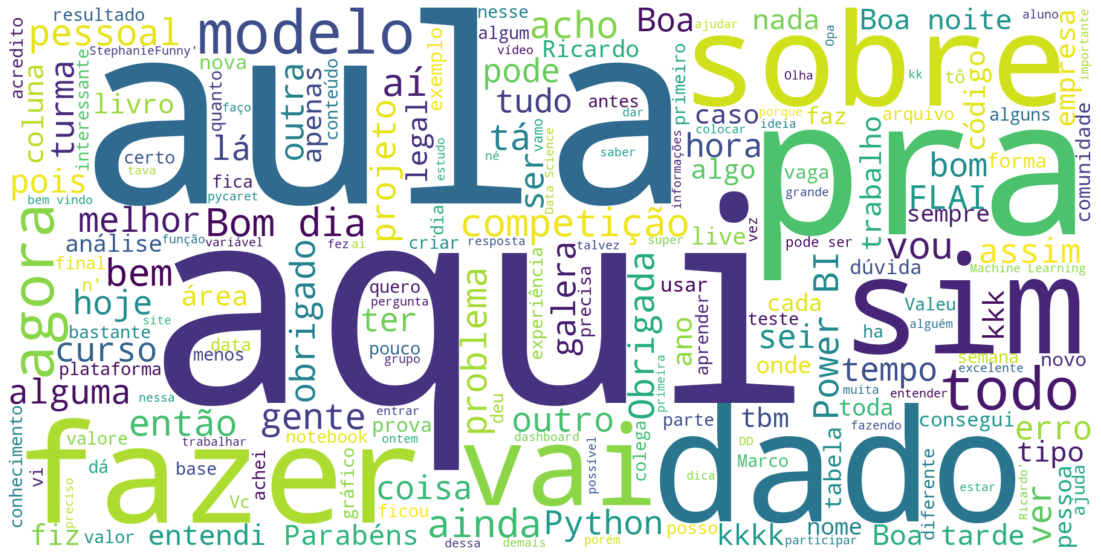

In [33]:
# Utilizando a biblioteca matplotlib para printar a imagem construída pela WordCloud
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ainda existem alguns termos que não nos explicam muita coisa e também podem ser removidos, o próximo passo vai ser limpar ainda mais esse modelo, adicionando esses termos na lista de stopwords.

A partir desse momento, a idéia é melhorar os stopwords, fazendo com que as palavras de melhor destaque apareçam na nuvem e trazer novas observações deste trabalho.

# Trabalhando com dados mensais no Wordcloud

In [34]:
# Criando uma função para realizar a consulta das informações referentes a períodos mensais
#def Consulta_cloud(mes):
def Consulta_cloud(dFrame, ano, mes):
    txt_begin = '{:04d}-{:02d}-01T00:00:00'.format(ano, mes)
    mes += 1
    if mes > 12:
        ano += 1
        mes = 1
    txt_end = '{:04d}-{:02d}-01T00:00:00'.format(ano, mes)
    base_cloud = dFrame.loc[(df['date'] >= (txt_begin)) & (df['date'] < (txt_end))]

    #base_cloud = df.loc[(df['date'] > ('2021-'+i+'-01T00:00:00'))&(df['date'] < ('2021-'+i+'-31T23:59:59'))]
    return base_cloud

In [40]:
# criando a base referente ao período desejado, necessitando somente digitar o indicativo referente ao mês
#cloud = Consulta_cloud(10)
ano = 2022
mes = 5
cloud = Consulta_cloud(df, ano, mes)


# Agrupando todas as mensagens do Dataframe na coluna "text" em uma única variavél para o período desejado
    #text = " ".join(text for text in cloud.text)
    #
    ## Printando o total de palavras e as mensagens 
    #print (f"O texto contém {len(text)} palavras.")
    #print("\n\n")
    #text

text = ObterTexto(cloud)

# Utilizando a biblioteca WordCloud para construir o modelo que faz a contagem da frequência das palavras mais utilizadas
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1800, height=900).generate(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


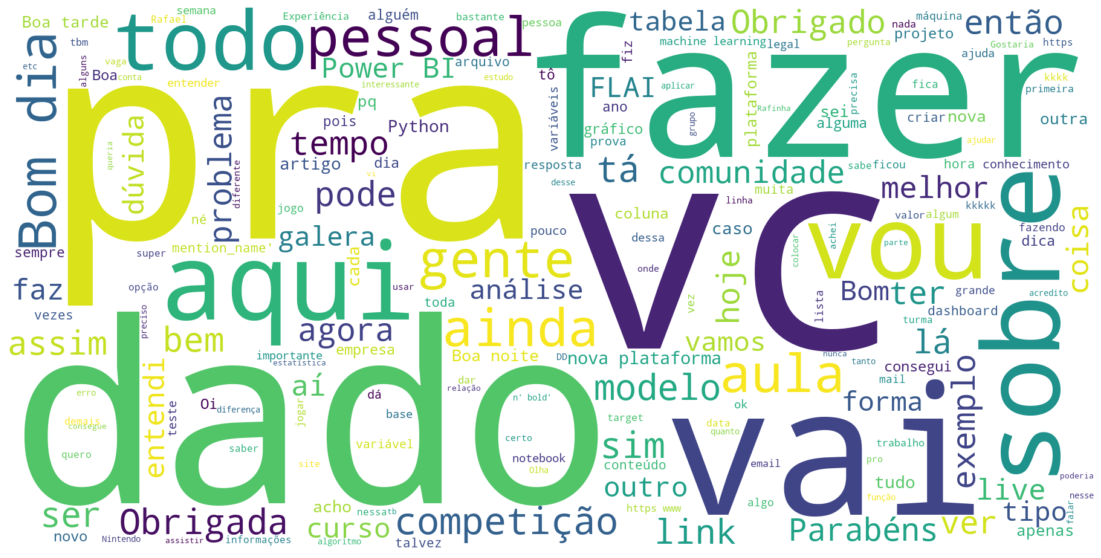

In [41]:
# Utilizando a biblioteca matplotlib para printar a imagem construída pela WordCloud
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Utilizando máscaras no Wordcloud

In [ ]:
# importando as bibliotecas necessárias nesta etapa
import numpy as np
import PIL
from PIL import Image

In [ ]:
# definindo uma imagem como máscara
mask1 = np.array(Image.open('/content/logo01.jpg'))
#mask2 = np.array(Image.open('/content/logo02.jpg'))
#mask3 = np.array(Image.open('/content/logo03.jpg'))

In [ ]:
# verificando a máscara importada
mask1[0]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [ ]:
# Utilizando a biblioteca WordCloud para construir o modelo que faz a contagem da frequência das palavras mais utilizadas
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


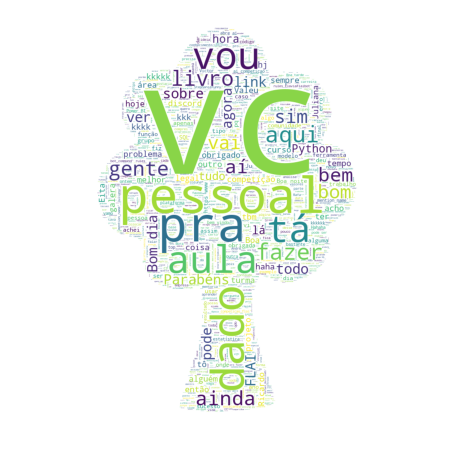

In [ ]:
# define o tipo de imagem que deseja utilizar como máscara
imagem = mask1

# Criando o objeto wordcloud com as configs necessárias
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white', width=1600,
                      height=800, max_words=3000, mask=imagem, max_font_size=1000,
                      min_font_size=1).generate(text)


#configurando forma de apresentação do gráfico e apresentando no notebook.
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

# Referências

- Aula NLP - Victor Araújo - Comunidade Flai
- https://www.nltk.org/

- https://medium.com/turing-talks/uma-an%C3%A1lise-de-dom-casmurro-com-nltk-343d72dd47a7

- https://matplotlib.org/2.0.2/api/pyplot_api.html

- https://www.ti-enxame.com/pt/python/adicionarremover-palavras-de-parada-com-spacy/828959558/

- https://minerandodados.com.br/cafe-com-codigo-05-processamento-de-linguagem-natural-com-nltk/

- https://carlos-bonfim.medium.com/como-criar-uma-wordcloud-no-formato-que-quiser-4d013d7d85db